In [6]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

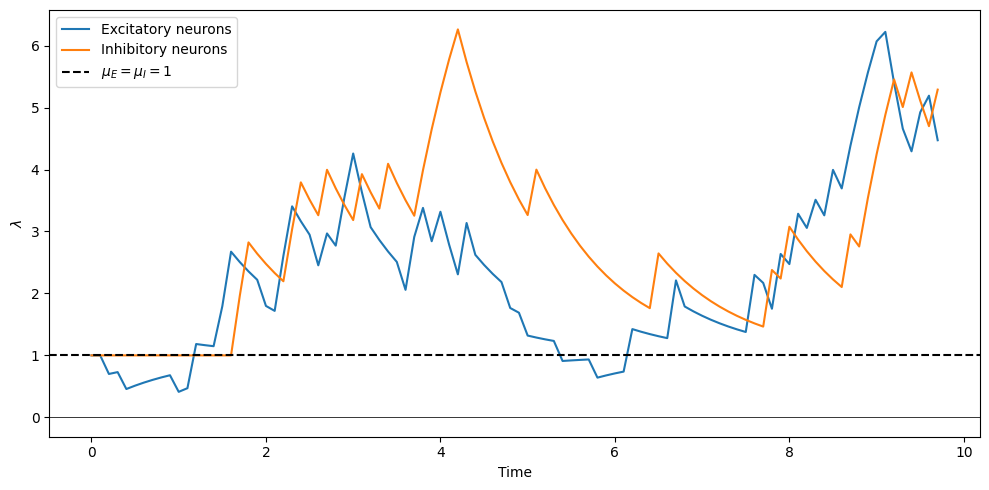

In [8]:
nmax = 10**2
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

fig = plt.figure(figsize=(10, 5))
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()


([], [])

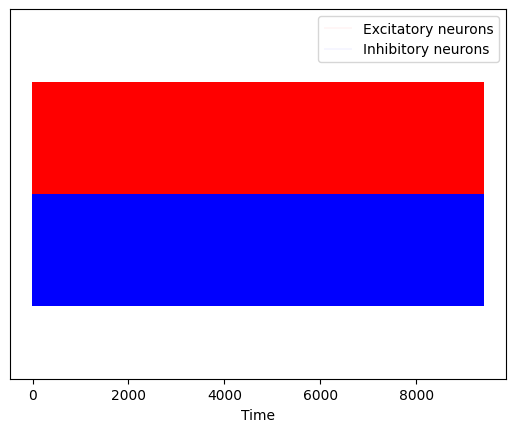

In [3]:
plt.eventplot(t_E, linelengths=0.5, linewidths=0.05, color = 'red', label = 'Excitatory neurons')
plt.eventplot(t_I, linelengths=0.5, linewidths=0.05, color = 'blue', lineoffsets= 0.5, label = 'Inhibitory neurons')
plt.xlabel('Time')
plt.ylabel('')
plt.legend()
plt.yticks([])


# Phase diagram $R=1$

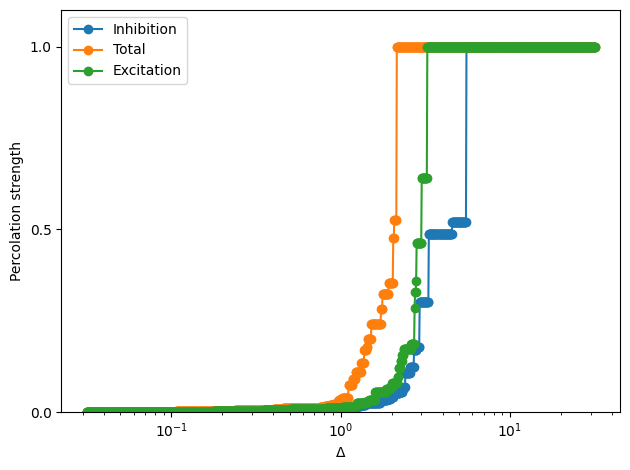

In [4]:
deltas = np.logspace(-1.5, 1.5, base= 10, num = 100)
percolation_strength_exc = calculate_percolation_strength(np.diff(t_E), deltas)
percolation_strength_inh = calculate_percolation_strength(np.diff(t_I), deltas)
t = np.concatenate((t_E, t_I))
t = np.sort(t)
percolation_strength_tot = calculate_percolation_strength(np.diff(t), deltas)
plt.plot(deltas, percolation_strength_inh, marker = 'o', label = 'Inhibition')
plt.plot(deltas, percolation_strength_tot, marker = 'o', label = 'Total')
plt.plot(deltas, percolation_strength_exc, marker = 'o', label = 'Excitation')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.legend()

plt.tight_layout()

0
1
2
3


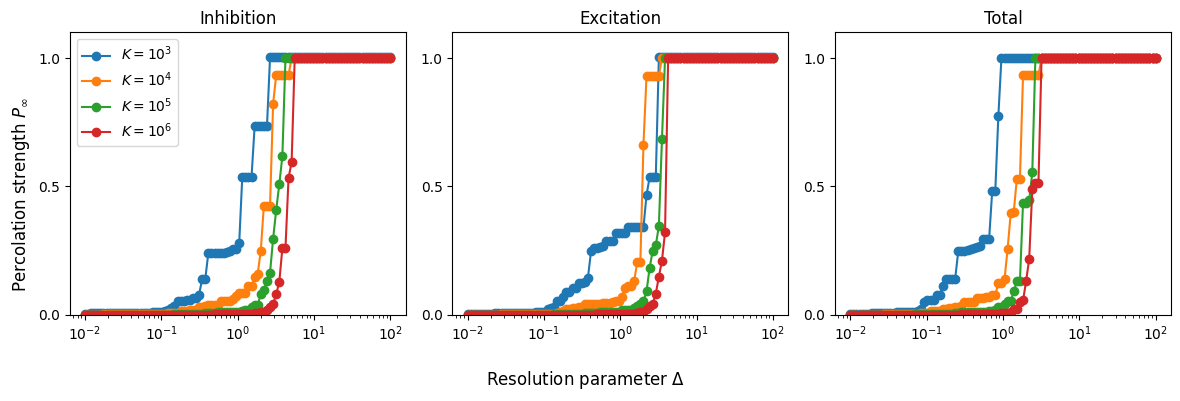

In [70]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$']
delta = np.logspace(-2, 2, base= 10, num = 100)
ax1 = fig.add_subplot(axgrid[0, 0])
ax2 = fig.add_subplot(axgrid[0, 1])
ax3 = fig.add_subplot(axgrid[0, 2])

for i in range(4):
        nmax = 10**(i+3)
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        perc_I = calculate_percolation_strength(np.diff(t_I), delta)
        perc_E = calculate_percolation_strength(np.diff(t_E), delta)
        perc_tot = calculate_percolation_strength(np.diff(t), delta)
        ax1.plot(delta, perc_I, marker = 'o', label = labels[i])
        ax2.plot(delta, perc_E, marker = 'o', label = labels[i])
        ax3.plot(delta, perc_tot, marker = 'o', label = labels[i])


ax1.set_title('Inhibition')
ax2.set_title('Excitation')
ax3.set_title('Total')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])

fig.supylabel('Percolation strength $P_{\infty}$')
fig.supxlabel('Resolution parameter $\Delta$')
ax1.legend()

fig.tight_layout()

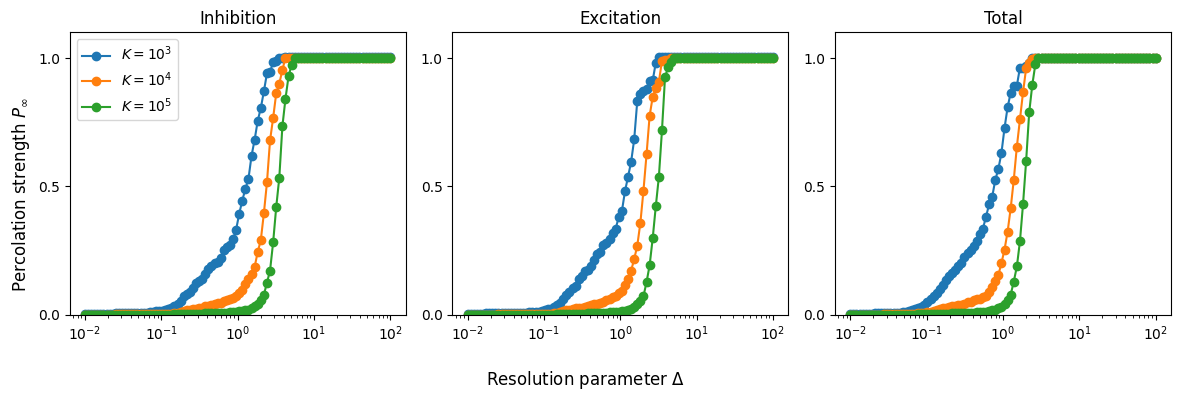

In [73]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$']
delta = np.logspace(-2, 2, base= 10, num = 100)
ax1 = fig.add_subplot(axgrid[0, 0])
ax2 = fig.add_subplot(axgrid[0, 1])
ax3 = fig.add_subplot(axgrid[0, 2])

R = 10**0

for i in range(3):
        nmax = 10**(i+3)
        percolations_I = np.zeros((R, len(delta)))
        percolations_E = np.zeros((R, len(delta)))
        percolations_tot = np.zeros((R, len(delta)))
        for j in range(R):
                time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
                t = np.concatenate((t_E, t_I))
                t = np.sort(t)
                percolations_E[j,:] = calculate_percolation_strength(np.diff(t_E), delta)
                percolations_I[j,:] = calculate_percolation_strength(np.diff(t_I), delta)
                percolations_tot[j,:] = calculate_percolation_strength(np.diff(t), delta)
        perc_I = np.mean(percolations_I, axis = 0)
        perc_E = np.mean(percolations_E, axis = 0)
        perc_tot = np.mean(percolations_tot, axis = 0)
        np.save(f'./data/model_perc_I_R={R}_K={nmax}', perc_I)
        np.save(f'./data/model_perc_E_R={R}_K={nmax}', perc_E)
        np.save(f'./data/model_perc_tot_R={R}_K={nmax}', perc_tot)
        ax1.plot(delta, perc_I, marker = 'o', label = labels[i])
        ax2.plot(delta, perc_E, marker = 'o', label = labels[i])
        ax3.plot(delta, perc_tot, marker = 'o', label = labels[i])
       

ax1.set_title('Inhibition')
ax2.set_title('Excitation')
ax3.set_title('Total')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])

fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 16)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 16)
ax1.legend()

fig.tight_layout()

# Stats $R=1$

In [74]:
nmax = 10**2
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.01

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

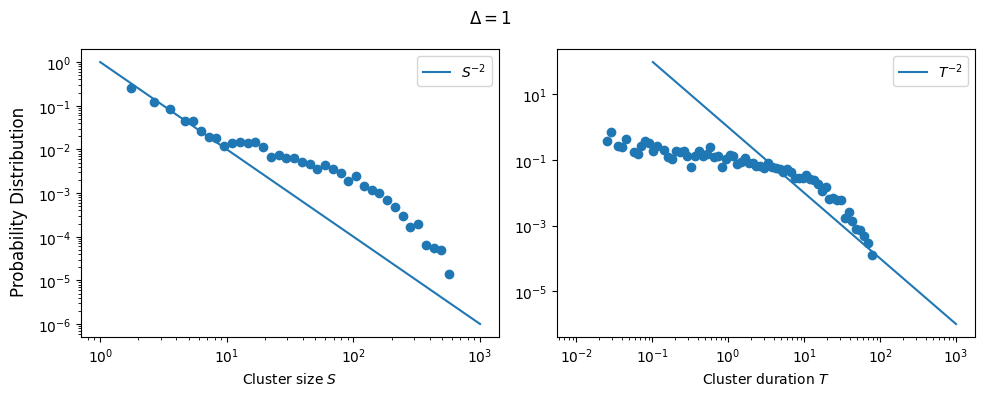

In [75]:
delta = 10**0
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 3, num = 100)
yt = t_bins**-2
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[20:], yt[20:], label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 1$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

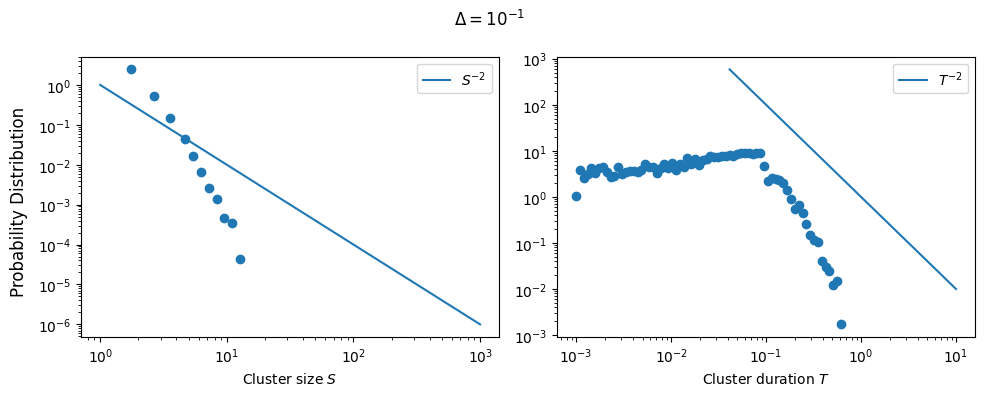

In [76]:
delta = 10**-1
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-3, 1, num = 100)
yt = t_bins**-2
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[40:], yt[40:], label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

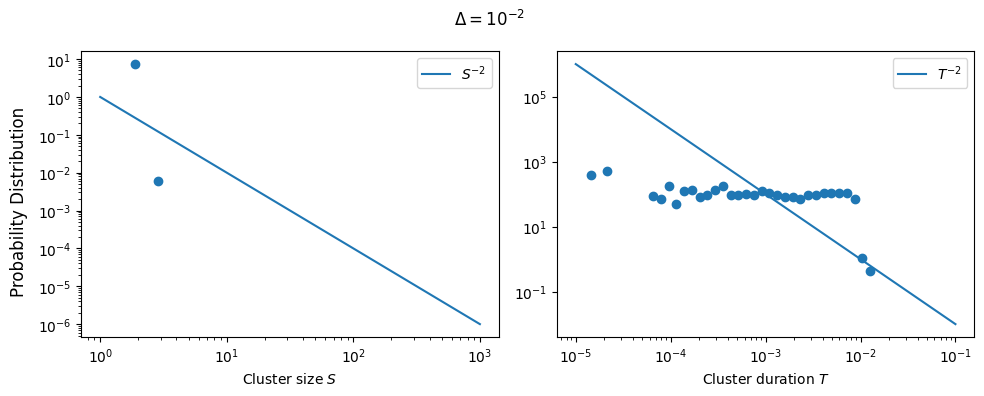

In [77]:
delta = 10**-2
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

# $t_I$

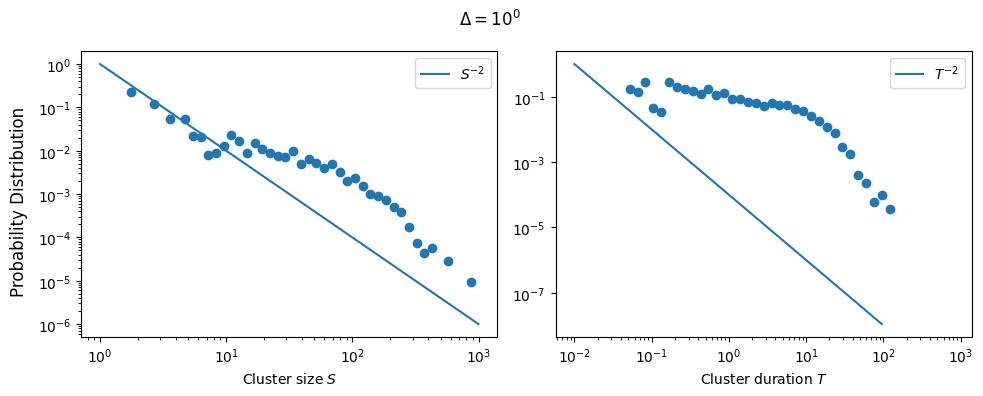

In [78]:
delta = 10**0
clusters = identify_clusters(t_I, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 3, num = 50)
yt = t_bins**-2*10**-4
yt2 = t_bins**-1
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[:-10], yt[:-10], label = '$T^{-2}$')
#ax1.plot(t_bins, yt2, label = '$T^{-1}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{0}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

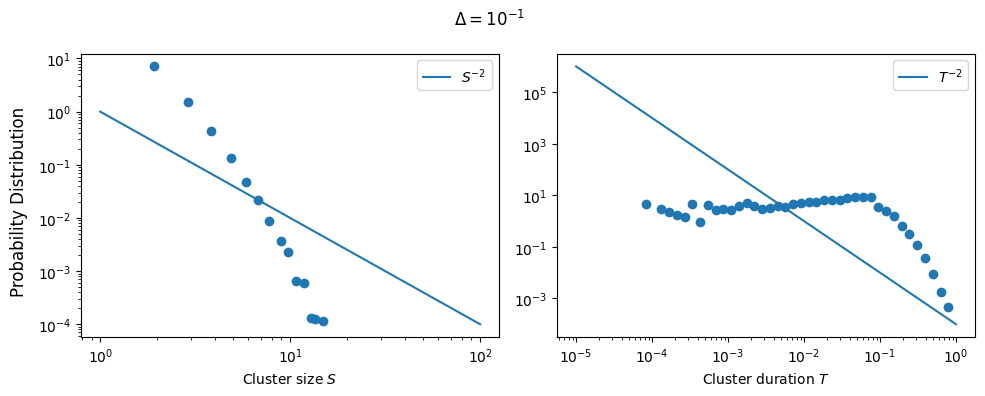

In [79]:
delta = 10**-1
clusters = identify_clusters(t_I, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, 0, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

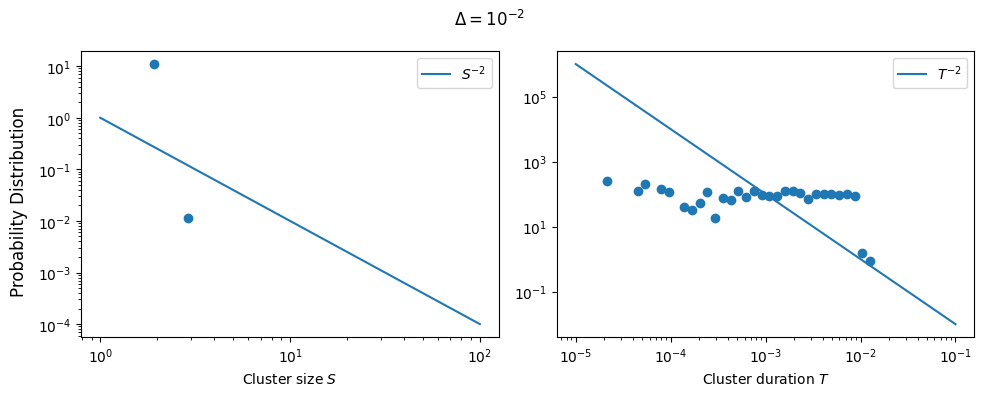

In [80]:
delta = 10**-2
clusters = identify_clusters(t_I, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

# $t_{tot}$

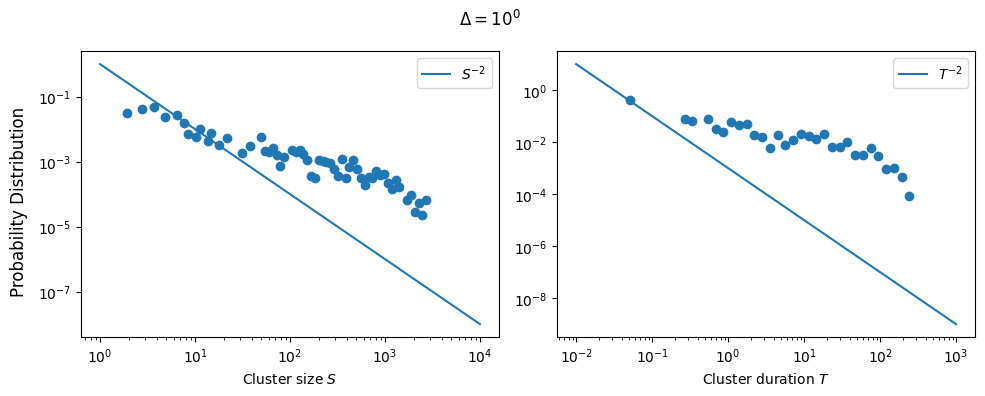

In [81]:
delta = 10**0
clusters = identify_clusters(t, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 4, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 3, num = 50)
yt = t_bins**-2*10**-3
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{0}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

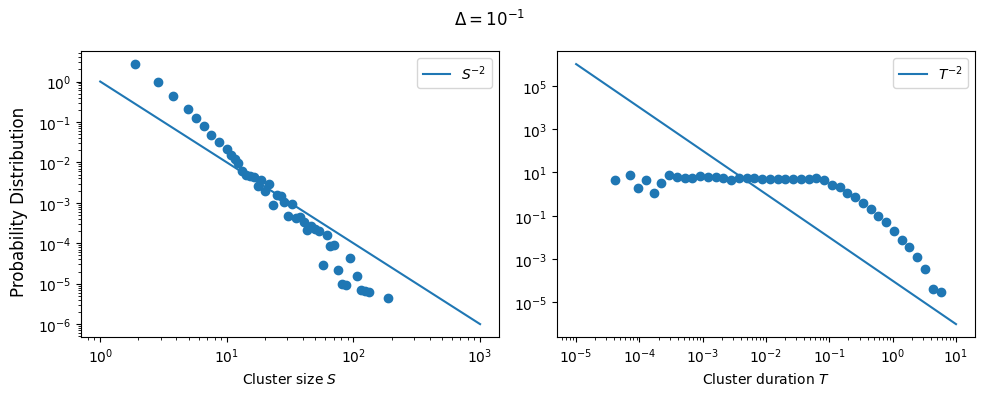

In [82]:
delta = 10**-1
clusters = identify_clusters(t, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, 1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

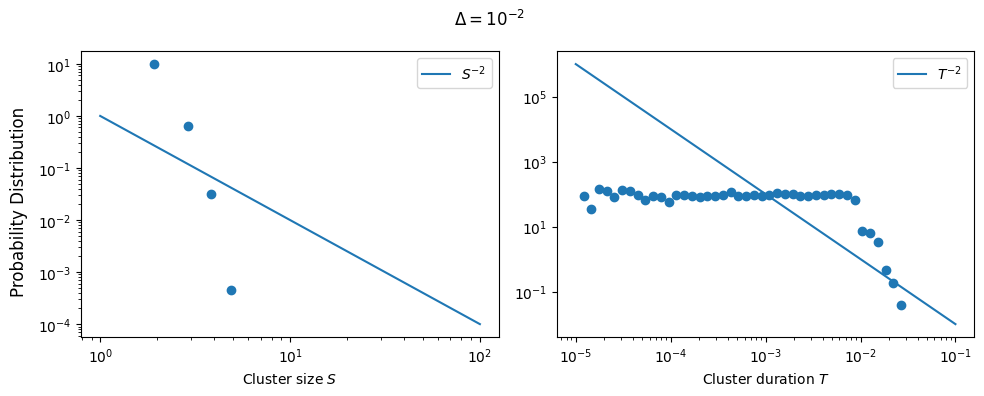

In [83]:
delta = 10**-2
clusters = identify_clusters(t, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

# Run here to save data

# Phase diagram $R=10^3$

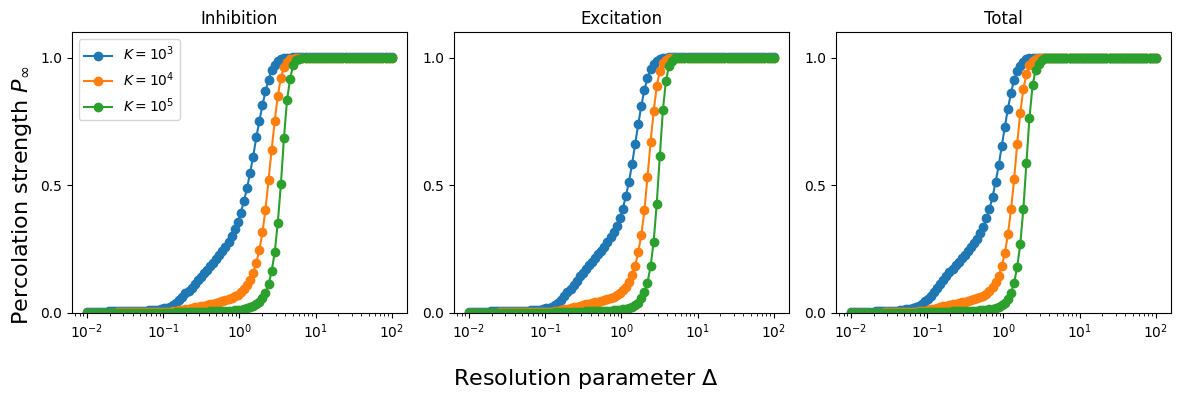

In [25]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$']
delta = np.logspace(-2, 2, base= 10, num = 100)
ax1 = fig.add_subplot(axgrid[0, 0])
ax2 = fig.add_subplot(axgrid[0, 1])
ax3 = fig.add_subplot(axgrid[0, 2])

R = 10**0

for i in range(3):
        nmax = 10**(i+3)
        percolations_I = np.zeros((R, len(delta)))
        percolations_E = np.zeros((R, len(delta)))
        percolations_tot = np.zeros((R, len(delta)))
        for j in range(R):
                time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
                t = np.concatenate((t_E, t_I))
                t = np.sort(t)
                percolations_E[j,:] = calculate_percolation_strength(np.diff(t_E), delta)
                percolations_I[j,:] = calculate_percolation_strength(np.diff(t_I), delta)
                percolations_tot[j,:] = calculate_percolation_strength(np.diff(t), delta)
        perc_I = np.mean(percolations_I, axis = 0)
        perc_E = np.mean(percolations_E, axis = 0)
        perc_tot = np.mean(percolations_tot, axis = 0)
        np.save(f'./data/model_perc_I_R={R}_K={nmax}', perc_I)
        np.save(f'./data/model_perc_E_R={R}_K={nmax}', perc_E)
        np.save(f'./data/model_perc_tot_R={R}_K={nmax}', perc_tot)
        ax1.plot(delta, perc_I, marker = 'o', label = labels[i])
        ax2.plot(delta, perc_E, marker = 'o', label = labels[i])
        ax3.plot(delta, perc_tot, marker = 'o', label = labels[i])
       

ax1.set_title('Inhibition')
ax2.set_title('Excitation')
ax3.set_title('Total')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])

fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 16)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 16)
ax1.legend()

fig.tight_layout()

# Stats $R=10^3$

#### save data

In [2]:
def identify_clusters_model(times, delta):
    """
    Identifies clusters in a temporal series given a resolution parameter delta
    Computes the size and duration of clusters
    
    ## Inputs:
    times: temporal series
    delta: resolution parameter

    ## Output:
    clusters: list of clusters
    clusters_sizes: list of sizes of clusters
    clusters_times: list of durations of clusters
    """
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    
    clusters_sizes = [len(cluster) for cluster in clusters]
    clusters_times = [cluster[-1] - cluster[0] for cluster in clusters]
    return clusters, clusters_sizes, clusters_times

# $\Delta = 1$

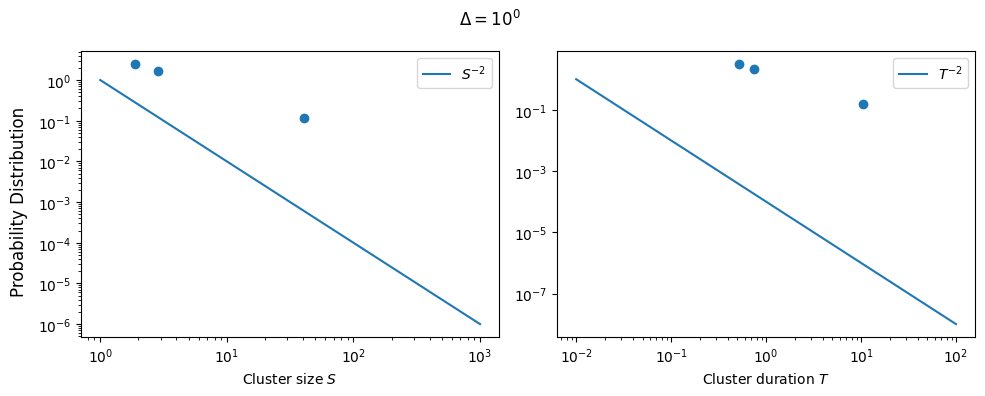

In [9]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 10**0

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 2, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{0}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)

# $\Delta = 10^{-1}$

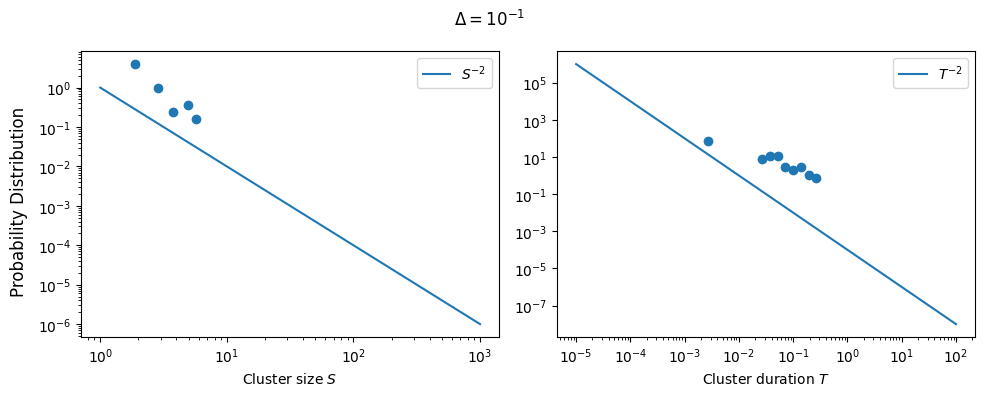

In [10]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 10**-1

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, 2, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 10^{-2}$ 

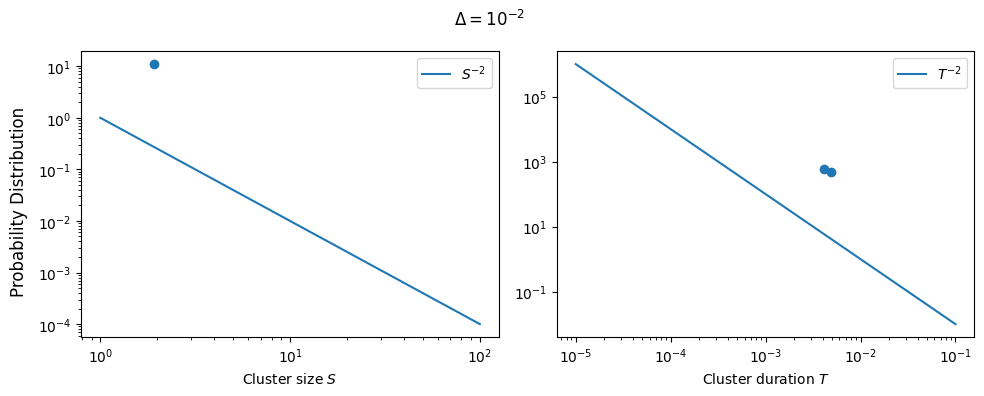

In [11]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 10**-2

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 2, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 2$

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


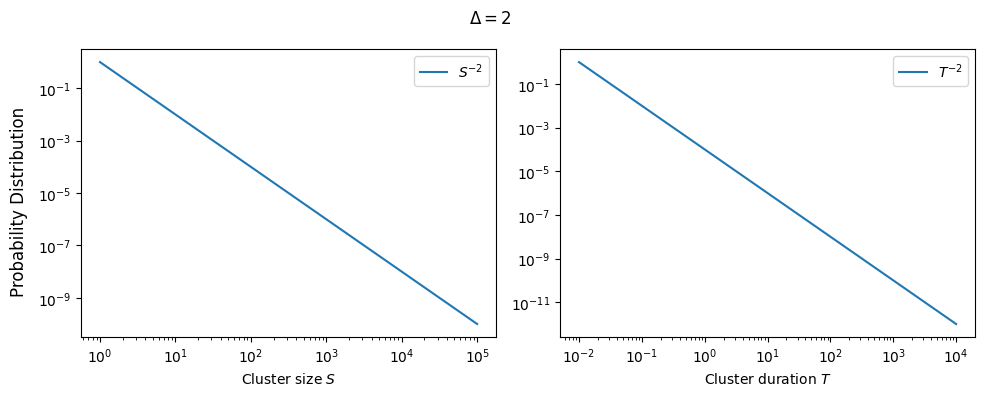

In [12]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 2

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 2$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 3$

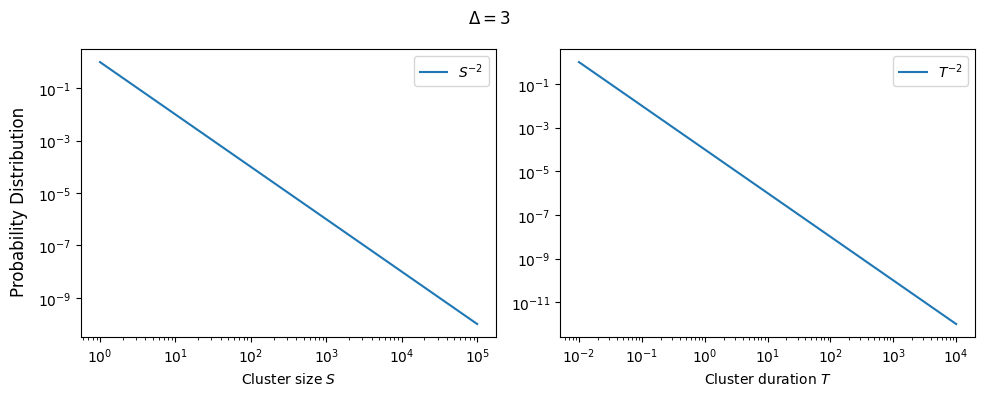

In [13]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 3

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 3$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 4$

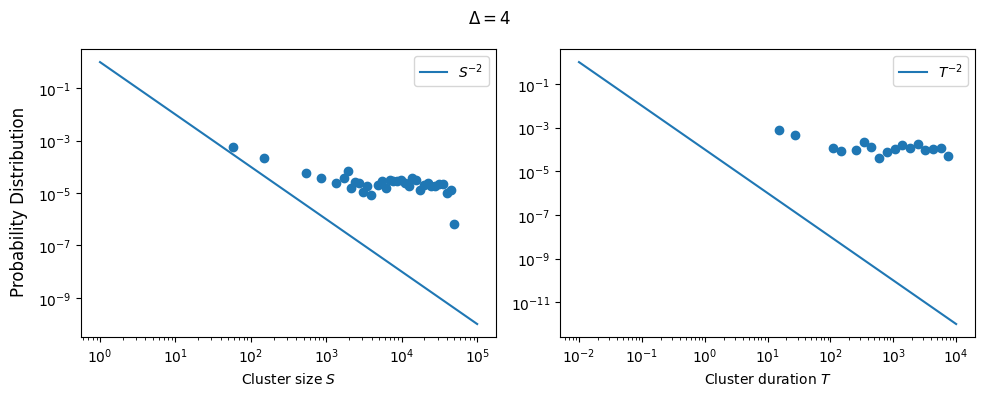

In [15]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 4

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 4$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# $\Delta = 5$

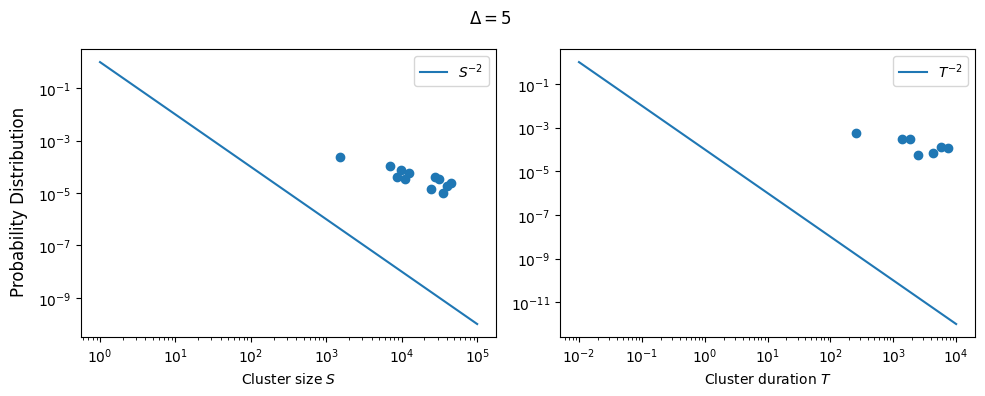

In [16]:
R = 10**3
nmax = 10**5
all_clusters_sizes_E = []
all_clusters_times_E = []
all_clusters_sizes_I = []
all_clusters_times_I = []
all_clusters_sizes_tot = []
all_clusters_times_tot = []

delta = 5

for _ in range(R):
        time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
        t = np.concatenate((t_E, t_I))
        t = np.sort(t)
        _, cluster_sizes_E, cluster_times_E  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_E.extend(cluster_sizes_E)
        all_clusters_times_E.extend(cluster_times_E)
        _, cluster_sizes_I, cluster_times_I  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_I.extend(cluster_sizes_I)
        all_clusters_times_I.extend(cluster_times_I)
        _, cluster_sizes_t, cluster_times_t  = identify_clusters_model(t_E, delta)
        all_clusters_sizes_tot.extend(cluster_sizes_t)
        all_clusters_times_tot.extend(cluster_times_t)

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 5, num = 100)
ys = s_bins**-2
s_hist = np.histogram(all_clusters_sizes_tot, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 4, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(all_clusters_times_tot, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 5$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

np.save(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_E)
np.save(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_E)
np.save(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_I)
np.save(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_I)
np.save(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_sizes_tot)
np.save(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}', all_clusters_times_tot)


# Al hacer las pruebas con $n_{EE}=1$ utilizar los dos valores de $\mu_E$

Comenzar con pocos valores de $\Delta$ para que no tarden las simulaciones y con límites grandes en el logspace, cuando se ahgan las medias afinar

KeyboardInterrupt: 

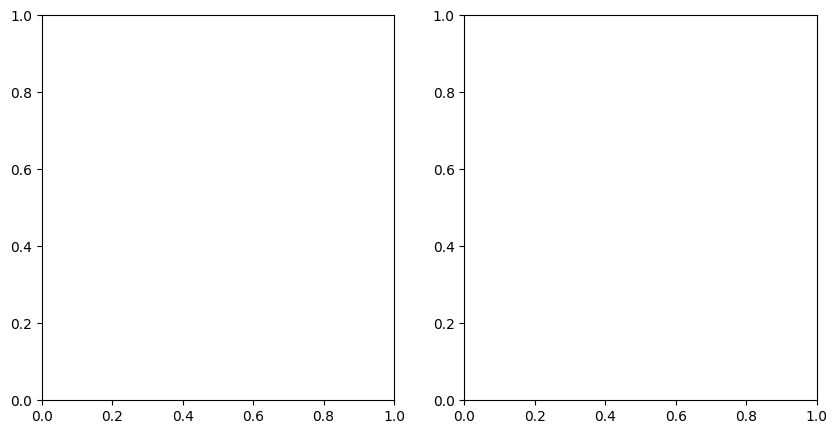

In [5]:
# nmax = 10**2
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mus_E = [10**-4, 100] 
mu_I = 0
tau = 1

n_EE = 1
n_IE = 0
n_EI = 0
n_II = 0

dt = 10**-2

nmax = 10**2

time, t_E,_, rates_E,_ = model(nmax, mus_E[0], mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

time, t_E,_, rates_E,_ = model(nmax, mus_E[0], mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
ax0.plot(time, rates_E, label='$\mu=10^{-4}$')
ax0.set_xlabel('Time')
ax0.set_ylabel('$\lambda$')
ax0.set_title('$\mu=10^{-4}$')
ax0.set_yscale('log')

time, t_E,_, rates_E,_ = model(nmax, mus_E[1], mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)
ax1.plot(time, rates_E, label='$\mu=10^{-4}$')
ax1.set_xlabel('Time')
ax1.set_ylabel('$\lambda$')
ax1.set_title('$\mu=10^2$')

fig.suptitle(f'$K={nmax}$')
fig.tight_layout()


In [24]:
nmax = 10**4

In [25]:
time, t_E_100,_, rates_E,_ = model(nmax, 100, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

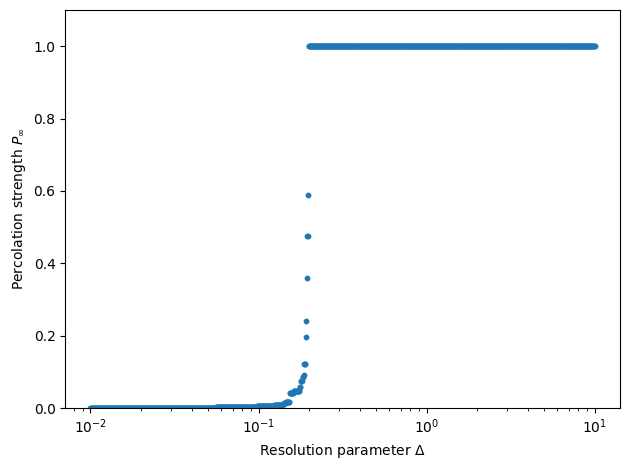

In [26]:
deltas = np.logspace(-2, 1, num = 1000)
percolation_strength = calculate_percolation_strength(np.diff(t_E_100), deltas)

plt.scatter(deltas, percolation_strength, s=10)
plt.xscale('log')
plt.ylim(0, 1.1)
plt.xlabel('Resolution parameter $\Delta$')
plt.ylabel('Percolation strength $P_{\infty}$')
plt.tight_layout()

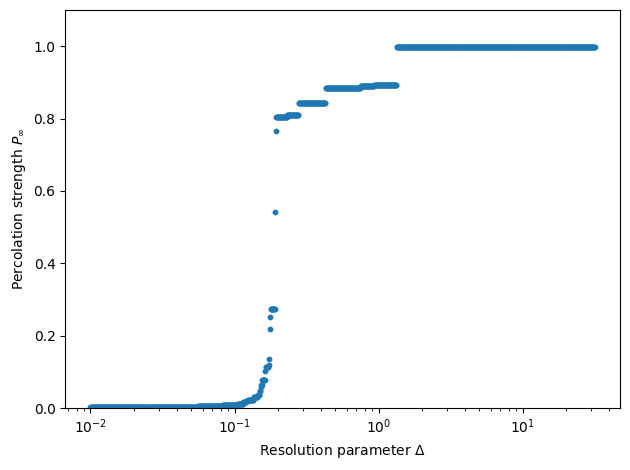

In [13]:
deltas = np.logspace(-2, 1.5, num = 1000)
percolation_strength = calculate_percolation_strength(np.diff(t_E), deltas)

plt.scatter(deltas, percolation_strength, s=10)
plt.xscale('log')
plt.ylim(0, 1.1)
plt.xlabel('Resolution parameter $\Delta$')
plt.ylabel('Percolation strength $P_{\infty}$')
plt.tight_layout()

In [18]:
#Delta = np.log(nmax)/(10**4+np.sqrt(2*nmax*10**-4))
Delta = 0.8
_, cluster_sizes, cluster_times = identify_clusters_model(t_E, Delta)
print(f'Number of clusters: {len(cluster_sizes)}')


Number of clusters: 0


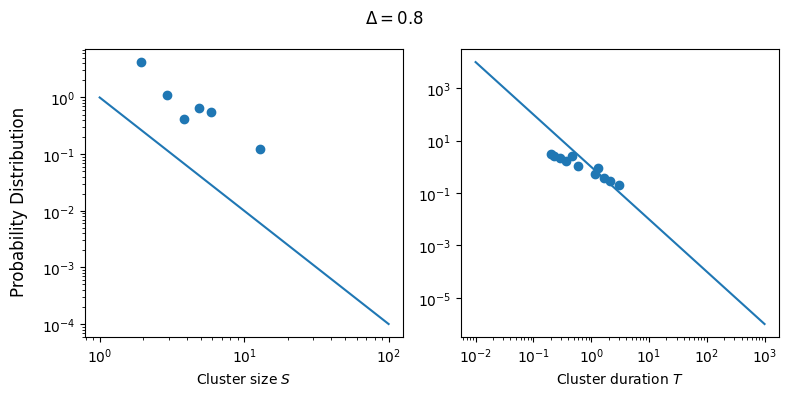

In [89]:
fig = plt.figure(figsize=(8, 4))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 2, num = 100)
t_bins = np.logspace(-2, 3, num = 100)
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
y_s = s_bins**-2
y_t = t_bins**-2

ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')   
ax0.plot(s_bins, y_s, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')

ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, y_t, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')

fig.suptitle(f'$\Delta = {Delta}$')
fig.supylabel('Probability Distribution')

plt.tight_layout()

# $n_{EE}=1$

# Phase diagram

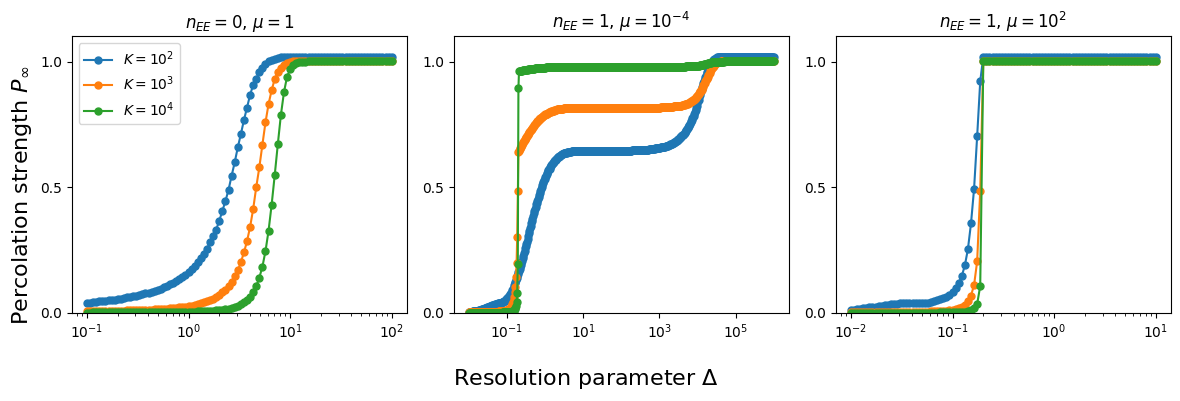

In [8]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

R = 10**3

mus = [1, 10**-4, 10**2]
ns = [0, 1, 1]
tau = 1
dt = 0.1

labels = ['$K=10^2$','$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(-1, 2, num = 100, base = 10), np.logspace(-2, 6, num = 500, base = 10), np.logspace(-2, 1, num = 100, base = 10)]
#np.save(f'./data/deltas_model_n_EE=1R={R}', deltas)
for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+2) # Cambiar a 3 cuando quiera la figura
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        
        for j in range(R):
            _, _, t_E, _, _ = model(K, mu, 0, tau, n, 0, 0, 0, dt)
            times_between_events = np.diff(t_E)
            percolations[j,:] = calculate_percolation_strength(times_between_events, delta)
        
        percolation_means = np.mean(percolations, axis=0)
        np.save(f'./data/percolation_means_model_n_EE=1_mu=_{mu}_K={K}_R={R}', percolation_means)
        ax.plot(delta, percolation_means, marker='o', markersize=5)
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n_{EE}=0$, $\mu=1$')
fig.axes[1].set_title('$n_{EE}=1$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n_{EE}=1$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1, fontsize=10)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

# Plot Stats

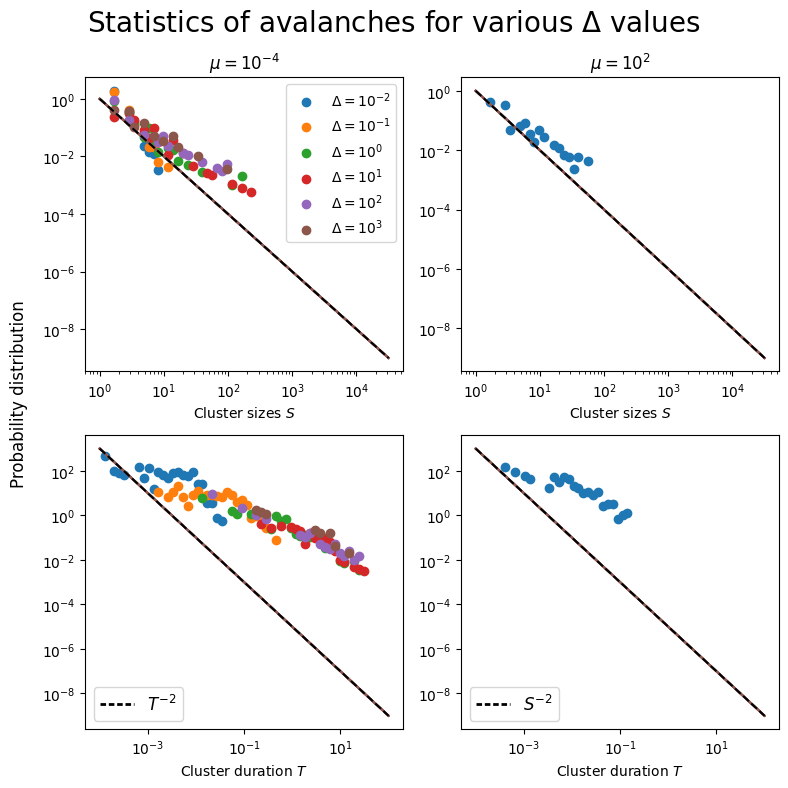

In [14]:
def plot_histograms(ax, data, bins, y_scale, title):
    hist = np.histogram(data, bins=bins, density=True)
    ax.scatter(bins[:-1], hist[0], label = title)
    ax.plot(bins, y_scale)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
def calculate_histogram_data(K, n, mu, delta, R=100):
    all_cluster_sizes = []
    all_cluster_times = []

    for _ in range(R):
        _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
        times, _ = generate_series(K, n, mu)
        _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)

    return all_cluster_sizes, all_cluster_times

R = 10**0
K = 10**3
n = 1
mu_values = [10**-4, 10**2]
deltas = np.logspace(-2, 3, num = 1+3-(-2), base=10)
delta_labels = ['$\Delta=10^{-2}$', '$\Delta=10^{-1}$', '$\Delta=10^{0}$', '$\Delta=10^{1}$', '$\Delta=10^{2}$', '$\Delta=10^{3}$']

s_bins = np.logspace(0, 4.5, num=60, base=10)
t_bins = np.logspace(-4, 2, num=60, base=10)

y_s = s_bins**(-2)
y_t = t_bins**(-2) * 10**-5
y_s2 = s_bins**(-3/2)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Añadir ylabel a la figura principal
fig.supylabel('Probability distribution', va='center', rotation='vertical')

for col, mu in enumerate(mu_values):
    all_sizes = []
    all_times = []
    for delta_idx, delta in enumerate(deltas):
        sizes, times = calculate_histogram_data(K, n, mu, delta, R)
        all_sizes.append(sizes)
        all_times.append(times)
        # Plot cluster sizes
        plot_histograms(
            axes[0, col],
            sizes,
            s_bins,
            y_s,
            delta_labels[delta_idx]
        )
        axes[0, col].set_ylabel('')
        axes[0, col].set_xlabel('Cluster sizes $S$')

        # Plot cluster durations
        plot_histograms(
            axes[1, col],
            times,
            t_bins,
            y_t,
            f'$\Delta={delta:.1E}$'
        )
        axes[1, col].set_ylabel('')
        axes[1, col].set_xlabel('Cluster duration $T$')

    # Añadir título solo en las figuras de arriba
    axes[0, col].set_title(f'$\mu = 10^{{{int(np.log10(mu))}}}$')

# Añadir etiquetas del eje x en las figuras de abajo
for ax in axes[1]:
    ax.set_xlabel('Cluster duration $T$')

fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[2].plot(t_bins, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_bins, y_t, color='black', linestyle='--')

fig.axes[0].legend(loc = 'best')
fig.axes[2].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)


fig.suptitle(f'Statistics of avalanches for various $\Delta$ values', fontsize=20)
fig.tight_layout()

Abajo, si tomamos $\Delta_1^* \approx 10^{-1}$ tenemos una estadística "rara" para $\mu=10^{-4}$ y no tenemos estadística para $\mu=100$

# Save data stats

### $\mu=10^{-4}$,  $\Delta=10^{-2}$

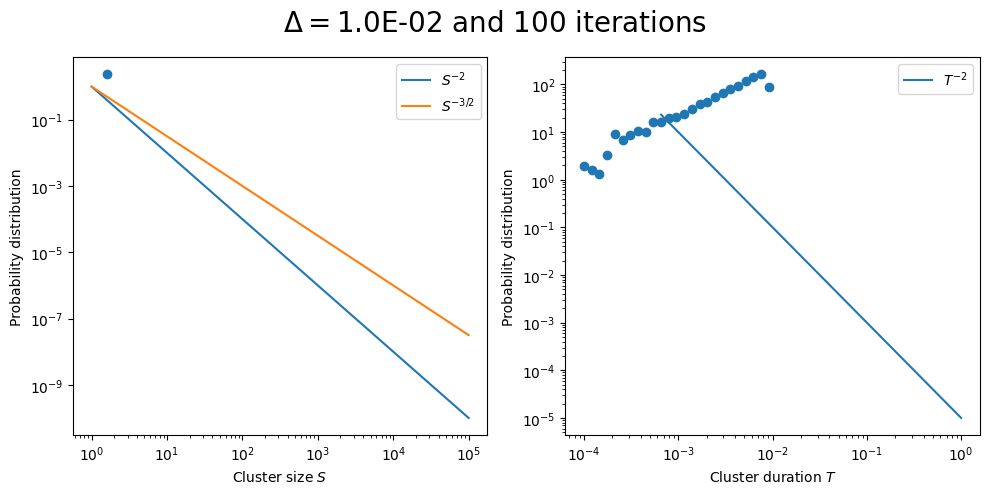

In [33]:
R = 10**2
K = 10**5
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-2

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, 0, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{-4}$,  $\Delta=10^{-1}$

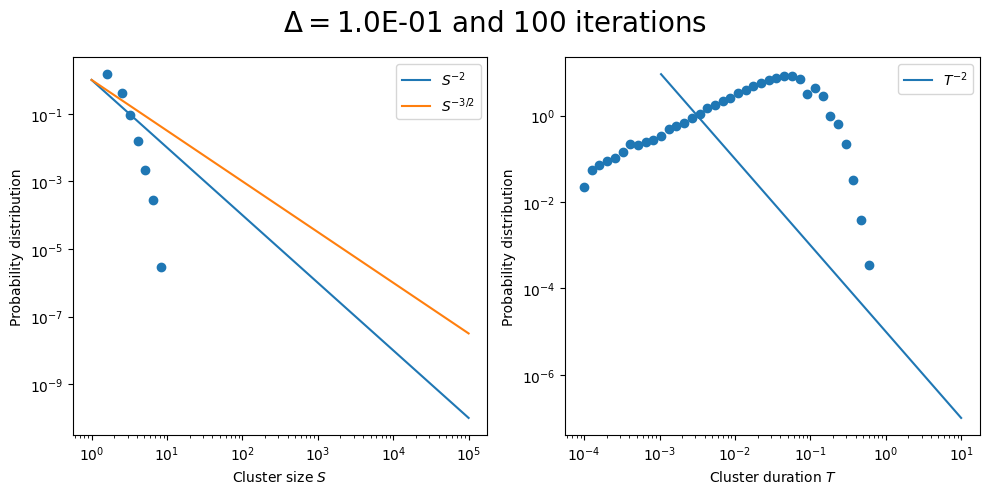

In [34]:
R = 10**2
K = 10**5
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-1

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, 1, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{-4}$,  $\Delta=10^{0}$

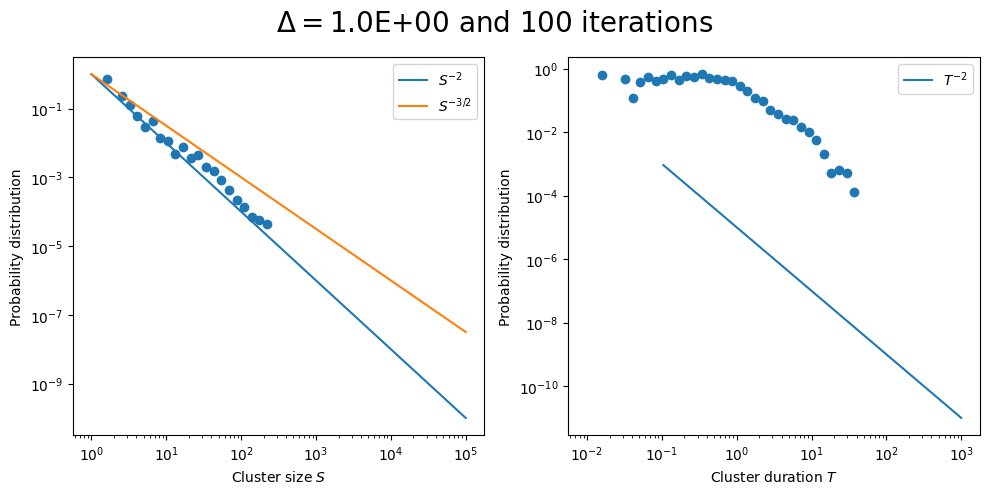

In [35]:
R = 10**2
K = 10**5
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**0

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 3, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{-4}$,  $\Delta=10^{5/2}$

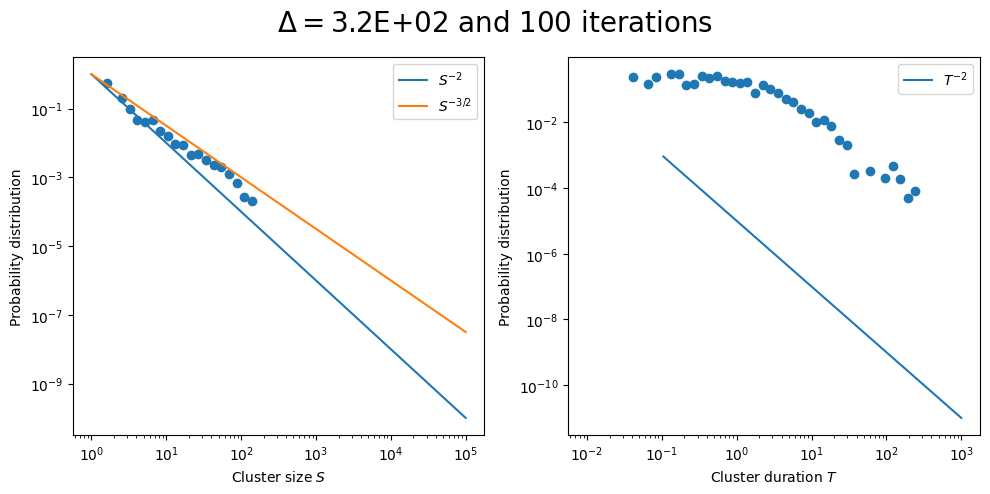

In [36]:
R = 10**2
K = 10**5
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**(5/2)

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 3, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{-4}$,  $\Delta=10^{3}$

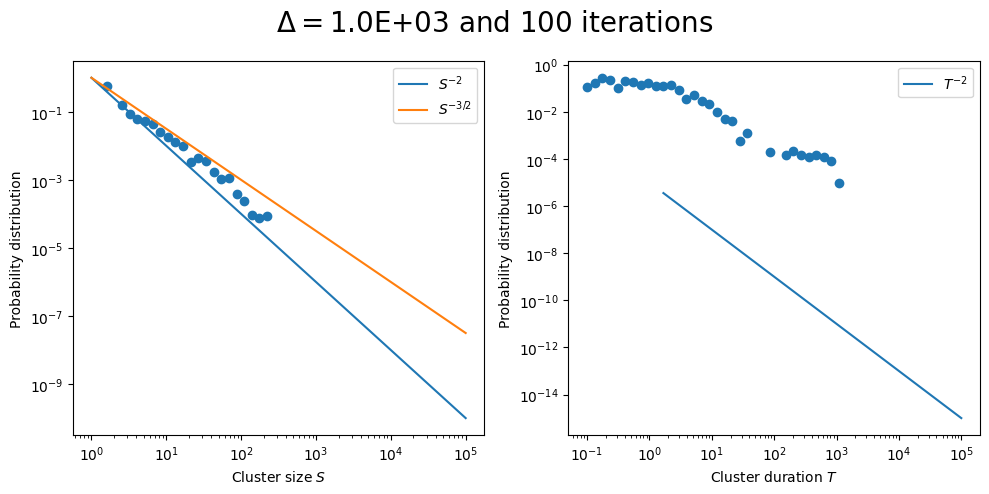

In [37]:
R = 10**2
K = 10**5
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**3

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-1, 5, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta_1^* \approx 10^{-1}$

### $\mu=10^{2}$,  $\Delta=\Delta^*_1/2$

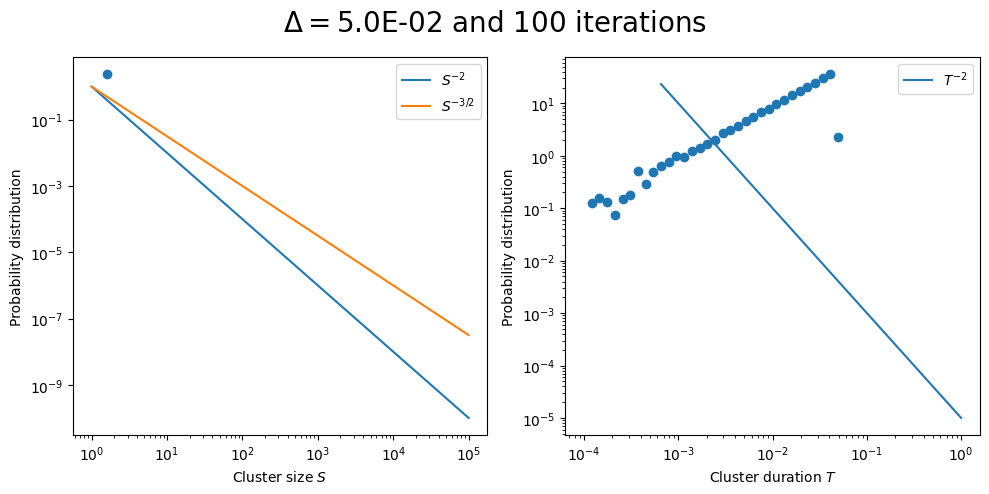

In [38]:
R = 10**2
K = 10**5
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-1/2

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, 0, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{2}$,  $\Delta=\Delta^*_1/2$

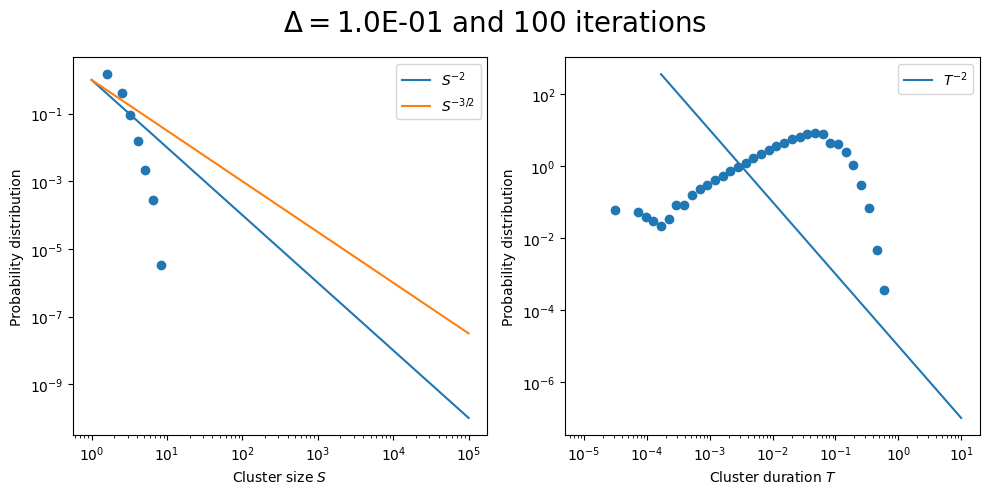

In [39]:
R = 10**2
K = 10**5
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 10**-1

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-5, 1, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{2}$, $\Delta=2\Delta^*_1$

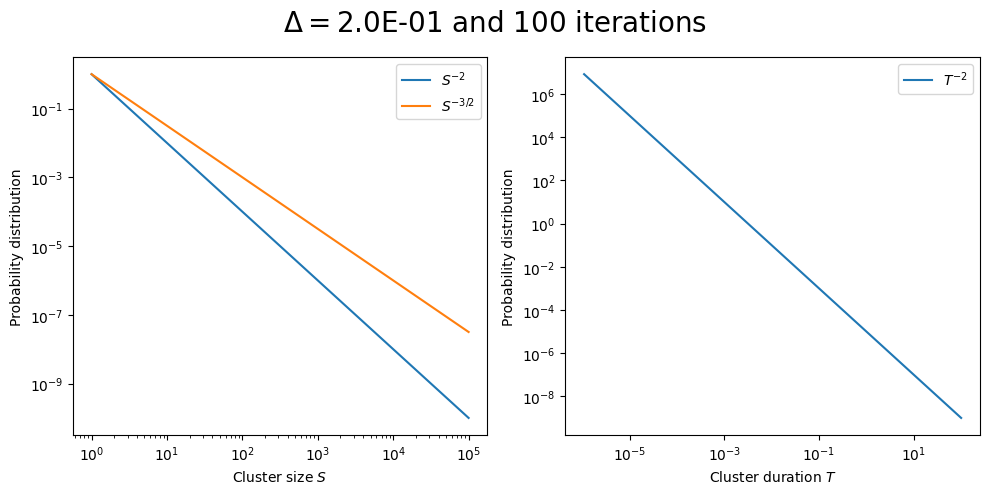

In [40]:
R = 10**2
K = 10**5
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 2*10**-1

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-8, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{2}$,  $\Delta=5\Delta^*_1$

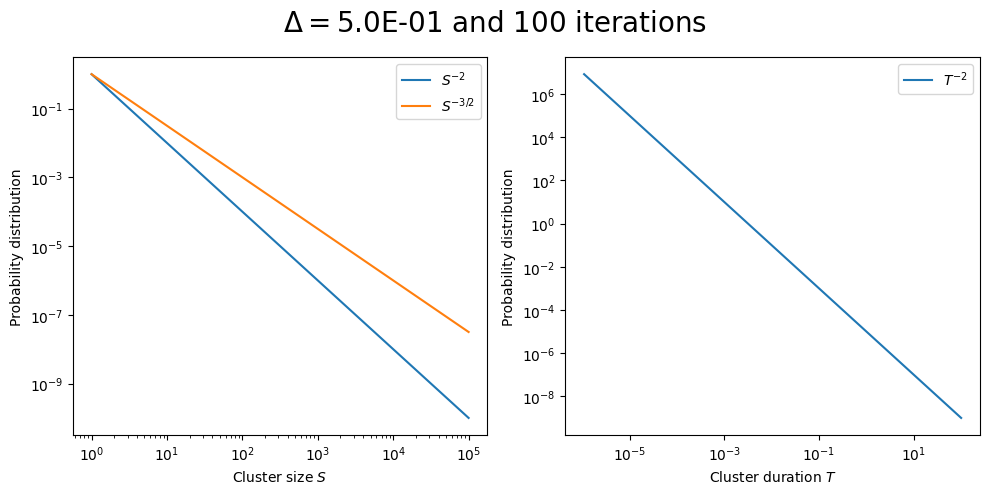

In [41]:
R = 10**2
K = 10**5
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 5*10**-1

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-8, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### Ahora los diagramas con $\Delta_1^* = \dfrac{log(K)}{\mu+\sqrt{2\mu K}}$

### $\mu=10^{-4}$,  $\Delta=10^{-1}\Delta_1^*$

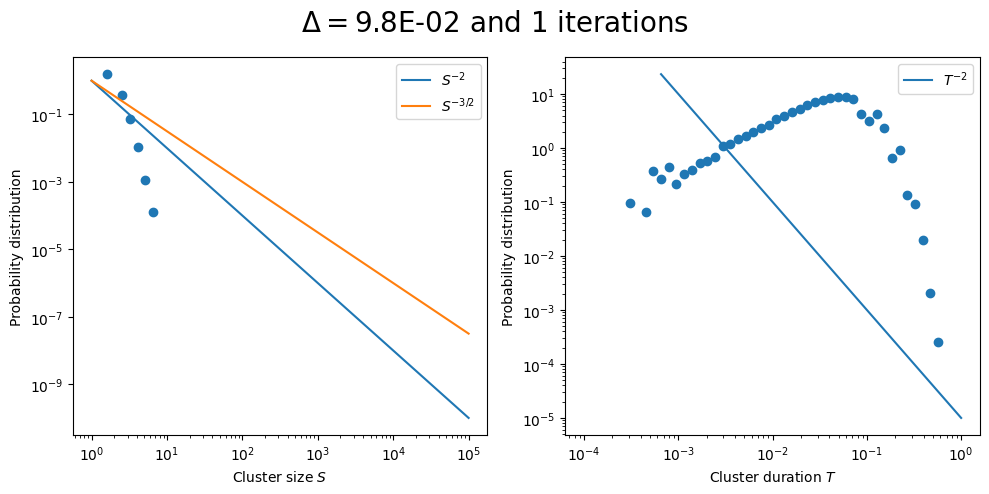

In [60]:
R = 10**0
K = 10**6
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = np.log(K)/(10**-4+np.sqrt(2*K*10**-4))/10


for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, 0, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{-4}$,  $\Delta=\Delta_1^*$

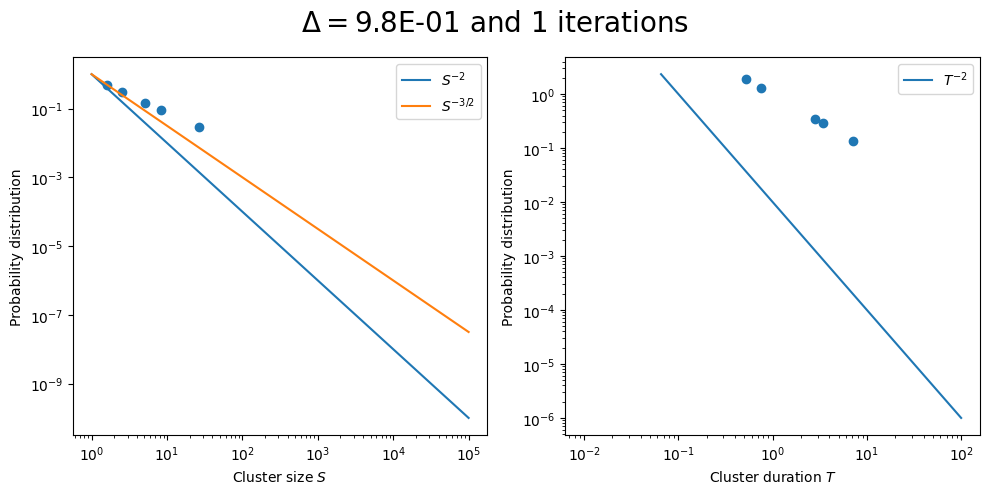

In [61]:
R = 10**0
K = 10**6
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = np.log(K)/(10**-4+np.sqrt(2*K*10**-4))

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-2
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{-4}$,  $\Delta=10^{5/2}\Delta_1^*$

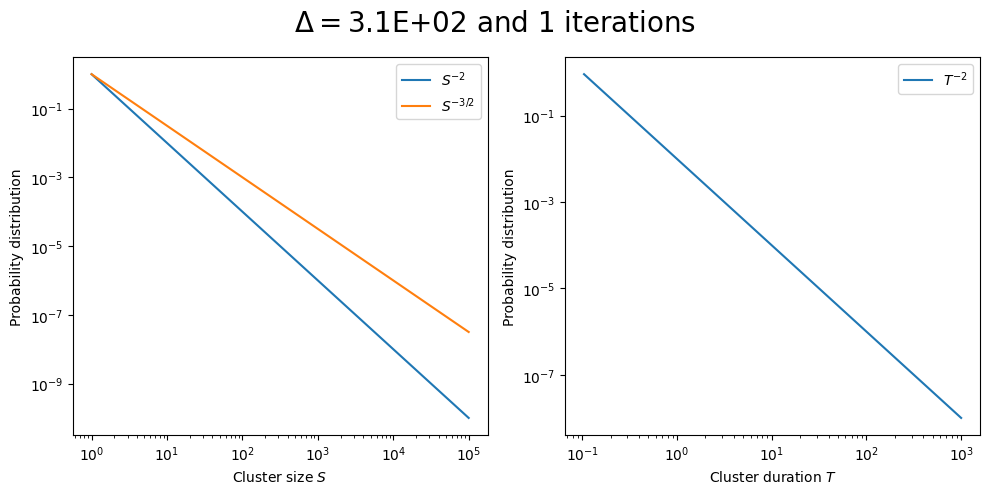

In [62]:
R = 10**0
K = 10**6
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = np.log(K)/(mu+np.sqrt(2*K*mu))*10**(5/2)

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 3, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-2
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{-4}$,  $\Delta=10^{3}$

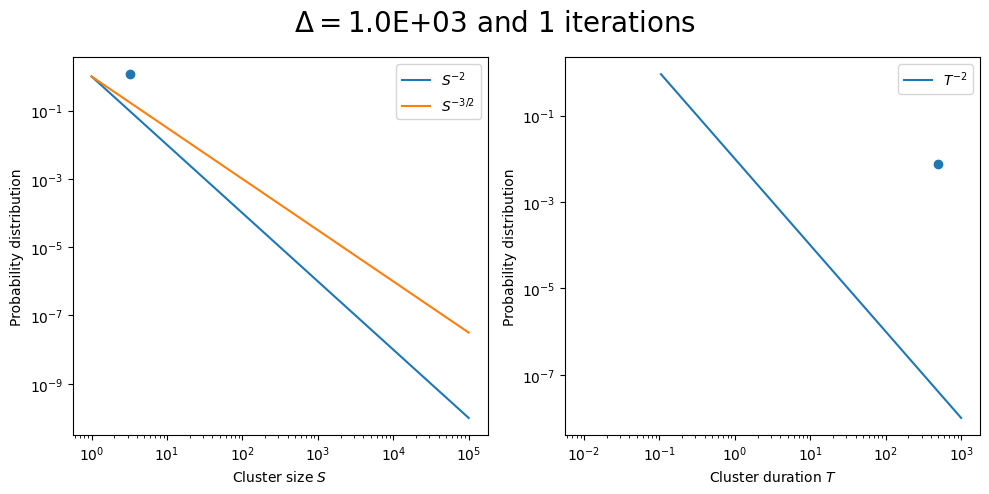

In [63]:
R = 10**0
K = 10**6
n = 1
mu = 10**-4
all_cluster_sizes = []
all_cluster_times = []
delta = 10**(3)

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-2, 3, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-2
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{2}$,  $\Delta=\Delta^*_1/2$

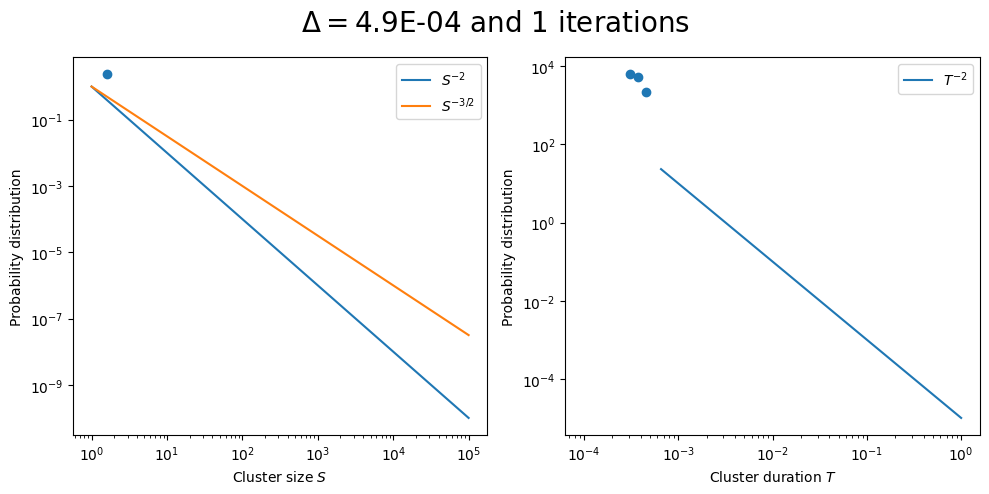

In [64]:
R = 10**0
K = 10**6
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = np.log(K)/(mu+np.sqrt(2*K*mu))/2

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, 0, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{2}$,  $\Delta=\Delta^*_1$

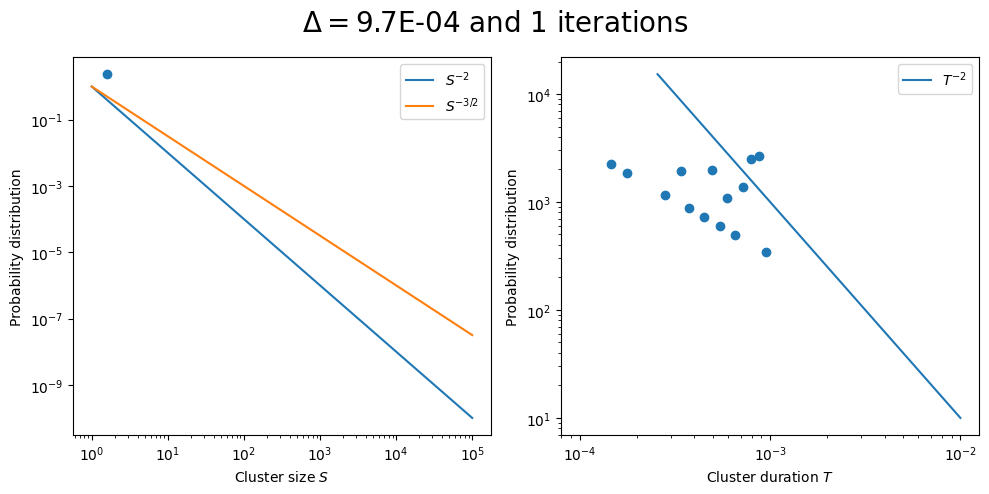

In [65]:
R = 10**0
K = 10**6
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = np.log(K)/(mu+np.sqrt(2*K*mu))

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, -2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-3
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{2}$, $\Delta=2\Delta^*_1$

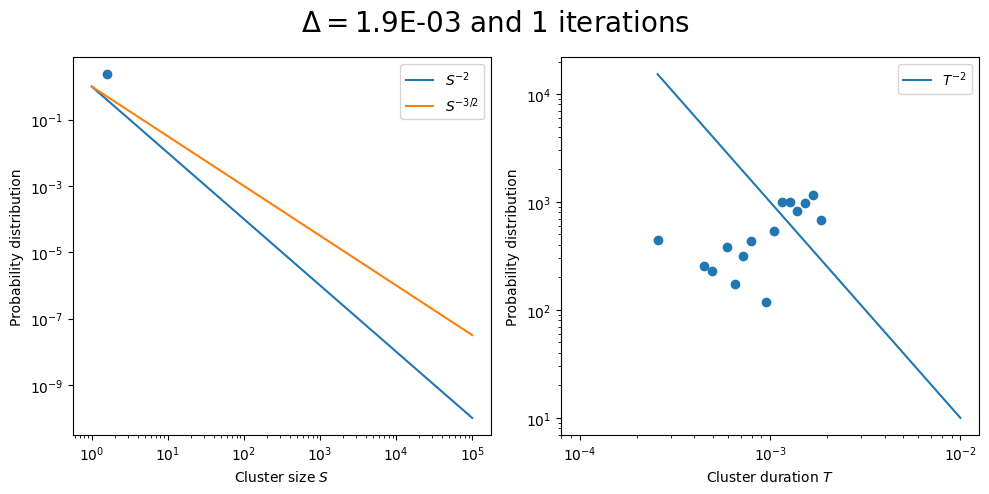

In [66]:
R = 10**0
K = 10**6
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = np.log(K)/(mu+np.sqrt(2*K*mu))*2

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, -2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-3
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

### $\mu=10^{2}$,  $\Delta=5\Delta^*_1$

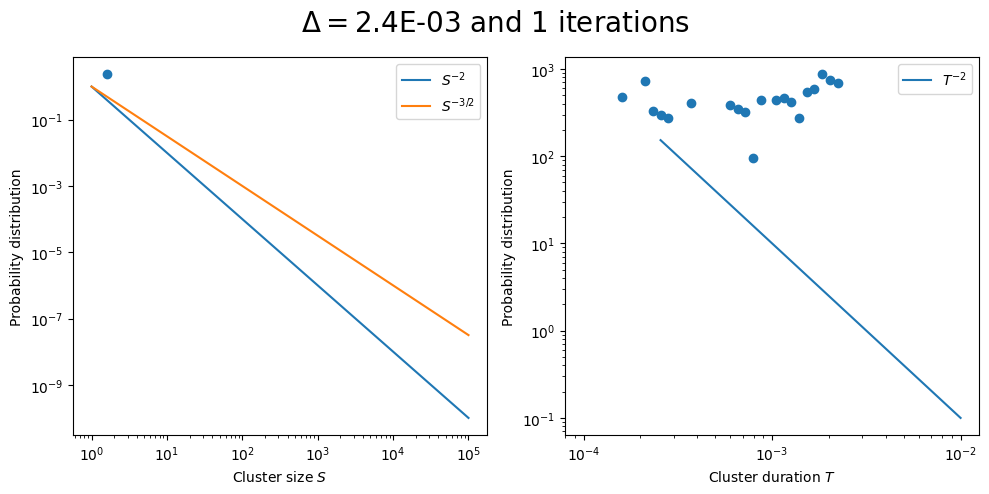

In [67]:
R = 10**0
K = 10**6
n = 1
mu = 10**2
all_cluster_sizes = []
all_cluster_times = []
delta = 5*np.log(K)/(mu+np.sqrt(2*K*mu))/2

for _ in range(R):
    _, times, _, _, _ = model(K, mu, 0, tau, 1, 0, 0, 0, 0.1)
    _, cluster_sizes, cluster_times = identify_clusters_model(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/model_n_EE=1_cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_sizes)
np.save(f'./data/model_n_EE=1_cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}', all_cluster_times)


s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, -2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()